# Determining whether the customer will churn

The goal for this dataset is to get a recall of > .94 and a precision score of > 0.91 This equates to a F1 score of better than 0.92

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1fJXTksdADtFnr6f4RPAFyIOWyn4yND-M')
df = df[df.columns[:-2]]
df.head(1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
df.shape

(10127, 21)

In [ ]:
X = df.iloc[:, 2:]
y = df.iloc[:, 1]

In [ ]:
X

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
y

0        Existing Customer
1        Existing Customer
2        Existing Customer
3        Existing Customer
4        Existing Customer
               ...        
10122    Existing Customer
10123    Attrited Customer
10124    Attrited Customer
10125    Attrited Customer
10126    Attrited Customer
Name: Attrition_Flag, Length: 10127, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10, stratify=y)

In [ ]:
X_test

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3933,47,F,3,Uneducated,Married,Unknown,Blue,42,4,1,4,25027.0,1501,23526.0,1.063,3357,62,0.771,0.060
2790,55,M,2,Post-Graduate,Single,$60K - $80K,Blue,37,3,3,1,22127.0,1799,20328.0,0.758,3591,63,0.750,0.081
8663,50,F,4,Doctorate,Married,Unknown,Silver,36,3,2,1,34516.0,2096,32420.0,0.666,7042,73,0.553,0.061
731,52,M,1,Doctorate,Married,$120K +,Blue,41,4,2,2,33864.0,989,32875.0,1.219,1751,48,0.920,0.029
3335,47,F,5,High School,Married,Less than $40K,Blue,36,5,3,1,1478.0,792,686.0,0.873,4123,67,0.489,0.536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,32,M,0,Graduate,Single,Less than $40K,Blue,26,6,3,3,6942.0,0,6942.0,0.544,2657,71,0.690,0.000
8608,56,M,2,Unknown,Single,$40K - $60K,Blue,48,2,2,1,14344.0,2014,12330.0,0.726,7359,85,0.574,0.140
6128,44,F,3,High School,Unknown,Less than $40K,Blue,36,3,3,2,2608.0,1804,804.0,0.847,4671,61,0.694,0.692
9203,43,F,3,Graduate,Unknown,Less than $40K,Blue,37,2,3,3,3461.0,1767,1694.0,0.829,13179,122,0.694,0.511


In [ ]:
X_test.insert(0, 'Attrition_Flag', y_test)

In [ ]:
X_test

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3933,Existing Customer,47,F,3,Uneducated,Married,Unknown,Blue,42,4,1,4,25027.0,1501,23526.0,1.063,3357,62,0.771,0.060
2790,Existing Customer,55,M,2,Post-Graduate,Single,$60K - $80K,Blue,37,3,3,1,22127.0,1799,20328.0,0.758,3591,63,0.750,0.081
8663,Existing Customer,50,F,4,Doctorate,Married,Unknown,Silver,36,3,2,1,34516.0,2096,32420.0,0.666,7042,73,0.553,0.061
731,Existing Customer,52,M,1,Doctorate,Married,$120K +,Blue,41,4,2,2,33864.0,989,32875.0,1.219,1751,48,0.920,0.029
3335,Existing Customer,47,F,5,High School,Married,Less than $40K,Blue,36,5,3,1,1478.0,792,686.0,0.873,4123,67,0.489,0.536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,Existing Customer,32,M,0,Graduate,Single,Less than $40K,Blue,26,6,3,3,6942.0,0,6942.0,0.544,2657,71,0.690,0.000
8608,Existing Customer,56,M,2,Unknown,Single,$40K - $60K,Blue,48,2,2,1,14344.0,2014,12330.0,0.726,7359,85,0.574,0.140
6128,Existing Customer,44,F,3,High School,Unknown,Less than $40K,Blue,36,3,3,2,2608.0,1804,804.0,0.847,4671,61,0.694,0.692
9203,Existing Customer,43,F,3,Graduate,Unknown,Less than $40K,Blue,37,2,3,3,3461.0,1767,1694.0,0.829,13179,122,0.694,0.511


In [ ]:
test_df = X_test

## Exporting test_set to a CSV

In [ ]:
test_df.to_csv('./test_bank_churners_rs_new.csv')

In [ ]:
X_train.insert(0, 'Attrition_Flag', y_train)
X_train

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9106,Existing Customer,41,F,2,Unknown,Married,Unknown,Blue,21,2,3,1,14746.0,0,14746.0,0.857,14771,127,0.628,0.000
2724,Existing Customer,48,M,4,Graduate,Married,$80K - $120K,Silver,40,6,2,5,34516.0,807,33709.0,0.967,3937,80,1.051,0.023
4037,Attrited Customer,53,F,1,Graduate,Single,Less than $40K,Blue,36,3,2,4,4287.0,0,4287.0,0.294,1635,41,0.242,0.000
3711,Existing Customer,47,M,3,High School,Married,$80K - $120K,Blue,40,3,3,3,12945.0,1582,11363.0,0.496,3369,59,0.788,0.122
10058,Existing Customer,43,M,4,Graduate,Married,$80K - $120K,Blue,35,3,2,3,3304.0,2517,787.0,0.741,14565,120,0.818,0.762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3293,Existing Customer,34,F,2,Unknown,Single,Less than $40K,Blue,29,3,1,0,5387.0,795,4592.0,0.837,2596,59,1.034,0.148
1593,Existing Customer,37,F,1,Unknown,Single,Less than $40K,Blue,32,6,3,3,9661.0,0,9661.0,0.926,2825,60,0.818,0.000
8038,Existing Customer,61,F,2,Graduate,Single,Less than $40K,Blue,45,2,2,3,2602.0,1441,1161.0,0.704,4838,85,0.735,0.554
1519,Existing Customer,56,M,1,High School,Married,$80K - $120K,Blue,36,4,1,2,3906.0,1851,2055.0,0.730,1839,33,0.833,0.474


In [ ]:
df = X_train

## Exploratory Data Analysis

In [ ]:
df.shape

(8101, 20)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000
mean,46.277990,2.347982,35.893347,3.802864,2.333292,2.441674,8647.931971,1166.064066,7481.867905,0.760714,4416.420442,64.978768,0.711564,0.275079
std,8.056207,1.297863,8.034554,1.554610,1.001857,1.106975,9095.724728,814.274799,9093.995953,0.220230,3403.949905,23.518604,0.237151,0.275524
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2552.000000,425.000000,1320.000000,0.631000,2164.000000,45.000000,0.583000,0.025000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4573.000000,1281.000000,3508.000000,0.737000,3910.000000,67.000000,0.700000,0.177000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11077.000000,1790.000000,9857.000000,0.861000,4752.000000,81.000000,0.818000,0.503000
max,70.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,134.000000,3.714000,0.999000


Based on this we see features such as "to buy credit line" has a standard deviation of 9090, meaning it is widely spread. We might have to do feature scaling since the features differ too much on the scales.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8101 entries, 9106 to 73
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            8101 non-null   object 
 1   Customer_Age              8101 non-null   int64  
 2   Gender                    8101 non-null   object 
 3   Dependent_count           8101 non-null   int64  
 4   Education_Level           8101 non-null   object 
 5   Marital_Status            8101 non-null   object 
 6   Income_Category           8101 non-null   object 
 7   Card_Category             8101 non-null   object 
 8   Months_on_book            8101 non-null   int64  
 9   Total_Relationship_Count  8101 non-null   int64  
 10  Months_Inactive_12_mon    8101 non-null   int64  
 11  Contacts_Count_12_mon     8101 non-null   int64  
 12  Credit_Limit              8101 non-null   float64
 13  Total_Revolving_Bal       8101 non-null   int64  
 14  Avg_Ope

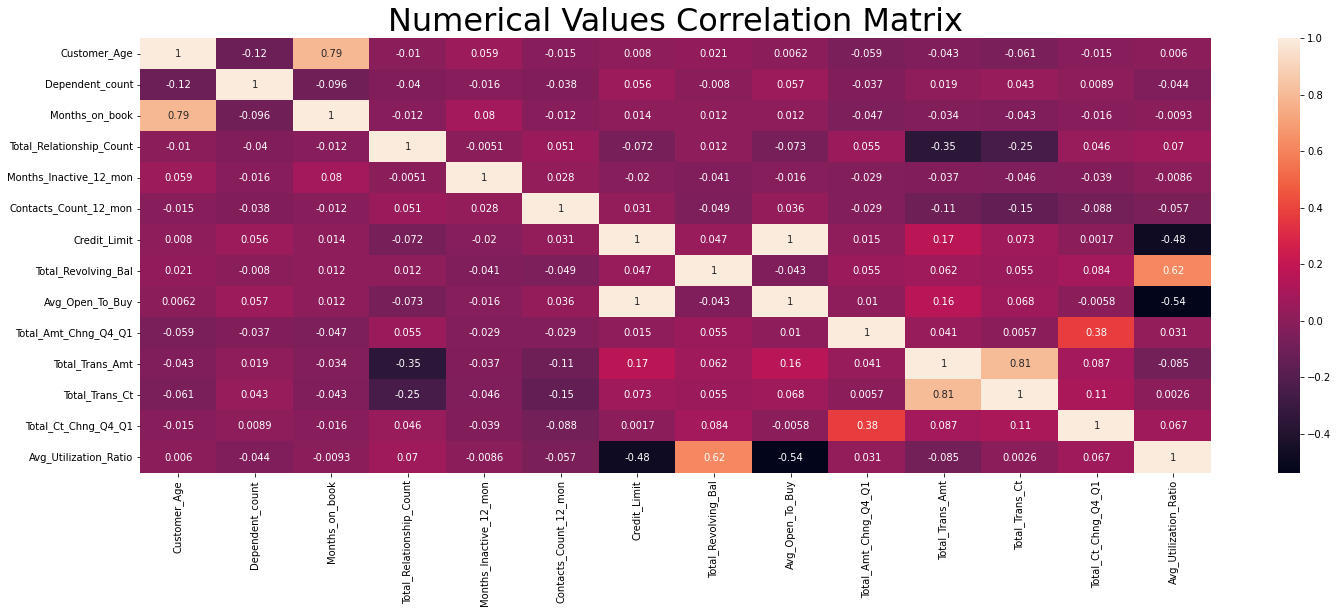

In [ ]:
plt.figure(figsize=[24,8])
plt.title("Numerical Values Correlation Matrix", size = 32)
sns.heatmap(df.corr(), annot=True)
plt.show()

Immediatley, we can see that Avg_Open_To_Buy & Credit Limit are perfectly correlated. We may consider dropping one of those features to avoid multicollinearity. However, we plan on using XGBoost which is immune to multicollinearity by nature

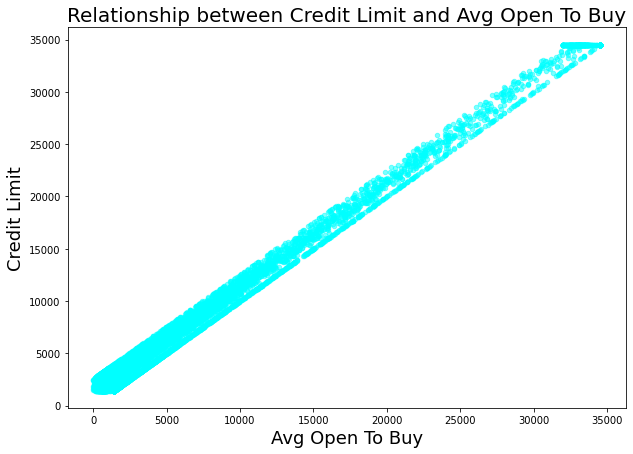

In [ ]:
df.plot(kind='scatter', x='Avg_Open_To_Buy', y='Credit_Limit', color='cyan', alpha=0.5, figsize=(10, 7))
plt.title('Relationship between Credit Limit and Avg Open To Buy', size=20)
plt.xlabel('Avg Open To Buy', size=18)
plt.ylabel('Credit Limit', size=18);

Creating a Histogram of our numerical features in order to find outliers

Text(0.5, 1.0, 'Numerical Features Distributions')

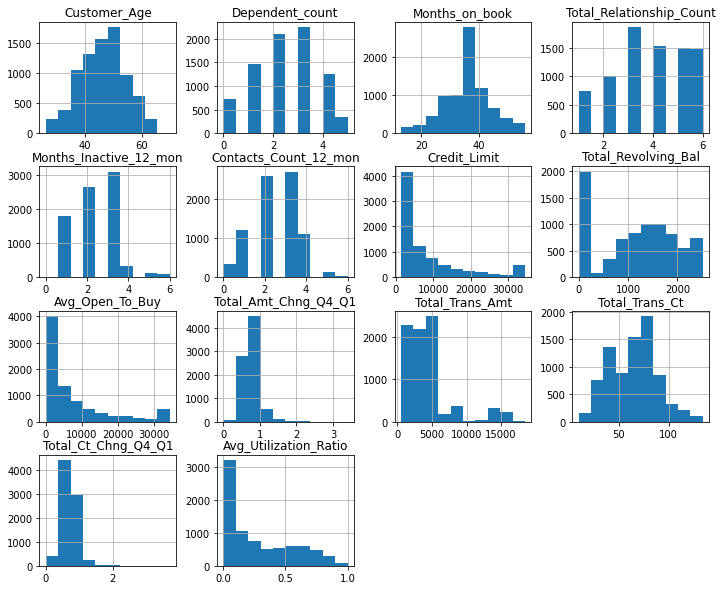

In [ ]:
df.hist(figsize =(12,10))
plt.title('Numerical Features Distributions')

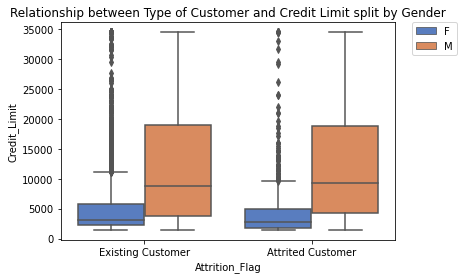

In [ ]:
plt.title('Relationship between Type of Customer and Credit Limit split by Gender')
sns.boxplot(x="Attrition_Flag", y="Credit_Limit", hue='Gender',
                    data=df, palette="muted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
import plotly.express as ex
ex.pie(df,names='Attrition_Flag',title='Attrition Distribution',hole=0.4)

With this imbalanced dependent variable we might implement a SMOTE, Synthetic Minority Oversampling Technique, for a better classification model

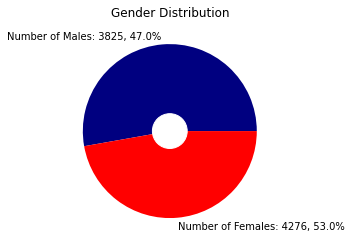

In [ ]:
names = [f"Number of Males: {len(df.loc[df.Gender == 'M'])}, {100 * round(len(df.loc[df.Gender == 'M'])/len(df),2)}%",
         f"Number of Females: {len(df.loc[df.Gender == 'F'])}, {100 * round(len(df.loc[df.Gender == 'F'])/len(df),2)}%" ]
plt.title("Gender Distribution")
plt.pie(df.Gender.value_counts(), labels=names, colors=['navy', 'red'])
my_circle=plt.Circle( (0,0), 0.2, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

The gender distribution is a bit skewed towards females, but not enough to be significant

In [ ]:
df.select_dtypes(['float64','int64'])

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9106,41,2,21,2,3,1,14746.0,0,14746.0,0.857,14771,127,0.628,0.000
2724,48,4,40,6,2,5,34516.0,807,33709.0,0.967,3937,80,1.051,0.023
4037,53,1,36,3,2,4,4287.0,0,4287.0,0.294,1635,41,0.242,0.000
3711,47,3,40,3,3,3,12945.0,1582,11363.0,0.496,3369,59,0.788,0.122
10058,43,4,35,3,2,3,3304.0,2517,787.0,0.741,14565,120,0.818,0.762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3293,34,2,29,3,1,0,5387.0,795,4592.0,0.837,2596,59,1.034,0.148
1593,37,1,32,6,3,3,9661.0,0,9661.0,0.926,2825,60,0.818,0.000
8038,61,2,45,2,2,3,2602.0,1441,1161.0,0.704,4838,85,0.735,0.554
1519,56,1,36,4,1,2,3906.0,1851,2055.0,0.730,1839,33,0.833,0.474


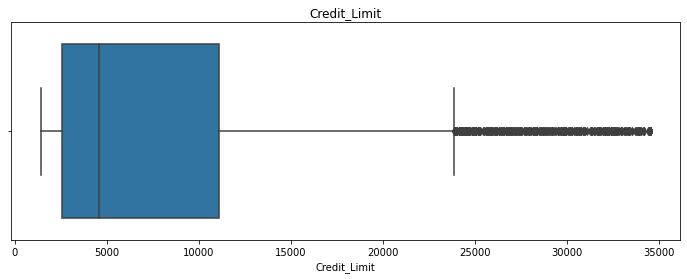

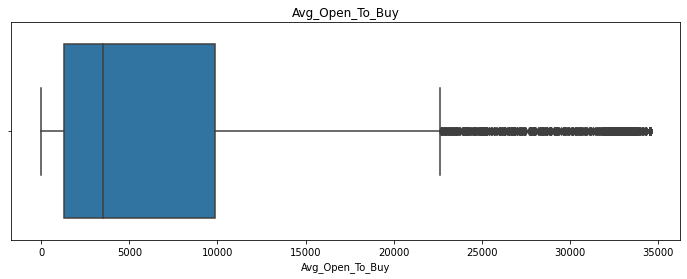

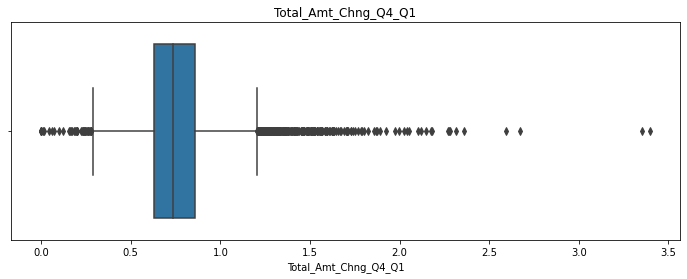

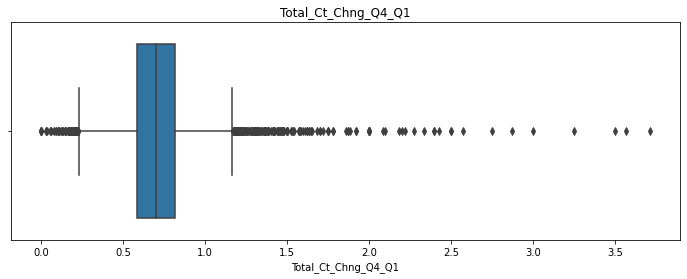

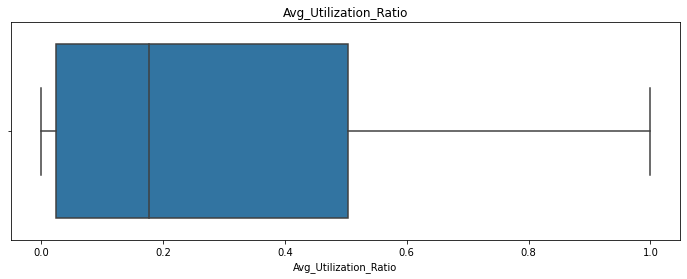

In [ ]:
for i in (df.select_dtypes(['float64'])).columns.to_list():
  plt.figure(figsize=[12,4])
  plt.title(i)
  plt.show(sns.boxplot(x=df[i]))

In [ ]:
ex.pie(df,names='Education_Level',title='Educational Differences',hole=0.2)

We can see most of the members have a graduate degree and a high school degree. The unknown variable is large which could have tremendous impact on this educational distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



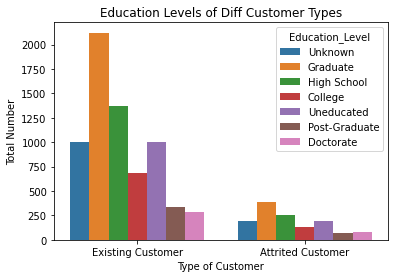

In [ ]:
att_ed_level = sns.countplot('Attrition_Flag',hue='Education_Level',data=df)
plt.ylabel('Total Number')
plt.xlabel('Type of Customer')
plt.title('Education Levels of Diff Customer Types')
plt.show()

Nothing out of ordinary here when it comes to education level betwen types of customer

In [ ]:
df.Card_Category.value_counts()

Blue        7543
Silver       447
Gold          94
Platinum      17
Name: Card_Category, dtype: int64

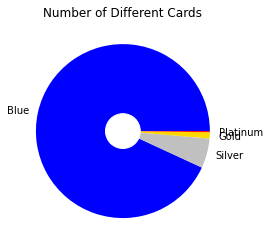

In [ ]:
plt.title("Number of Different Cards")
names = ['Blue', 'Silver', 'Gold', 'Platinum']
plt.pie(df.Card_Category.value_counts(), labels=names, colors=['Blue','Silver', 'Gold', 'Red'])
my_circle=plt.Circle( (0,0), 0.2, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

Most of the banks members has at best a blue card

Things to note in exploratory analysis:


* Credit_Limit & Avg to Open have perfect correlation - **may need to remove one**
* Months on Book, Months Inactive 12 mon, Contacts Count 12 mon have some outliers. However, we have many outliers in Total_Trans_Am, Credit_Limit  - **will remove outliers**
* Interquartile Range when analyzing Total Relationship Count against Gender with Attrition Flag as a hue is much tighter for male customers who leave
* Attrited Customers account for 16.1% of data, Existing Customers 83.9% **- may need to implement SMOTE**
* Vast majority of all customers have a Blue or Silver card at best
* Because of the imbalanced dependent variable we may need to apply SMOTE for an overall better classification model


## Training A base model, logistic regression

In [ ]:
X = df.select_dtypes(['float64', 'int64']).iloc[:,1:].values
y = df.Attrition_Flag.replace({'Attrited Customer':1,'Existing Customer':0})

In [ ]:
X_base_train, X_base_test, y_base_train, y_base_test = train_test_split(X, y, test_size = 0.2, random_state=10, stratify = y)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 10)
classifier.fit(X_base_train, y_base_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=10)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_base_pred = classifier.predict(X_base_test)
cm = confusion_matrix(y_base_test, y_base_pred)
print(cm)
accuracy_score(y_base_test, y_base_pred)

[[1317   43]
 [ 147  114]]


0.8827884022208513

Performance metrics on untrained logistic regression:
Recall 0.56, Precision: 0.77, F1: 0.65

## Changing the Categorical Data

In [ ]:
df.Attrition_Flag = df.Attrition_Flag.replace({'Attrited Customer':1,'Existing Customer':0})
df.Gender = df.Gender.replace({'F':1,'M':0})
df.head(1)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9106,0,41,1,2,Unknown,Married,Unknown,Blue,21,2,3,1,14746.0,0,14746.0,0.857,14771,127,0.628,0.0


In [ ]:
df = pd.concat([df,pd.get_dummies(df['Education_Level']).drop(columns=['Unknown'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Income_Category']).drop(columns=['Unknown'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Marital_Status']).drop(columns=['Unknown'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Card_Category']).drop(columns=['Platinum', "Gold"])],axis=1)
df.drop(columns = ['Education_Level','Income_Category','Marital_Status','Card_Category', 'Avg_Open_To_Buy'],inplace=True)
df.head(1)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Silver
9106,0,41,1,2,21,2,3,1,14746.0,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
from scipy import stats
treshold = 5
z_score_val = np.abs(stats.zscore(df))
print(np.where(z_score_val > treshold))

(array([  25,   25,  252,  264,  529,  616,  725,  776,  787, 1272, 1402,
       1476, 1796, 1844, 1895, 1965, 1965, 2083, 2099, 2357, 2594, 2851,
       2851, 3110, 3469, 3614, 3632, 3933, 4305, 4541, 4575, 4864, 4908,
       4940, 4942, 4972, 5271, 5274, 5385, 5550, 5550, 5740, 5773, 6034,
       6324, 6338, 7188, 7590, 7605, 7612, 8060, 8082]), array([10, 13, 10, 13, 13, 13, 10, 10, 10, 10, 13, 10, 13, 10, 13, 10, 13,
       13, 13, 13, 13, 10, 13, 13, 13, 13, 10, 10, 13, 13, 10, 10, 13, 10,
       13, 13, 13, 10, 10, 10, 13, 10, 10, 10, 10, 13, 13, 13, 13, 13, 13,
       10]))


In [ ]:
print(f"The extreme outliers are in: {df.columns[10]}, and in {df.columns[13]}")

The extreme outliers are in: Total_Amt_Chng_Q4_Q1, and in Total_Ct_Chng_Q4_Q1


In [ ]:
df_wo_outliers = df[(z_score_val < treshold).all(axis=1)]

In [ ]:
print(f"Total outliers removed are: {len(df) - len(df_wo_outliers)}")

Total outliers removed are: 48


## Classifying the dependent variable and the features

In [ ]:
X = df_wo_outliers.iloc[:,1:]
y = df_wo_outliers.iloc[:,0]

In [ ]:
X

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,...,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Silver
9106,41,1,2,21,2,3,1,14746.0,0,0.857,...,0,0,0,0,0,0,1,0,1,0
2724,48,0,4,40,6,2,5,34516.0,807,0.967,...,0,0,0,1,0,0,1,0,0,1
4037,53,1,1,36,3,2,4,4287.0,0,0.294,...,0,0,0,0,1,0,0,1,1,0
3711,47,0,3,40,3,3,3,12945.0,1582,0.496,...,0,0,0,1,0,0,1,0,1,0
10058,43,0,4,35,3,2,3,3304.0,2517,0.741,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3293,34,1,2,29,3,1,0,5387.0,795,0.837,...,0,0,0,0,1,0,0,1,1,0
1593,37,1,1,32,6,3,3,9661.0,0,0.926,...,0,0,0,0,1,0,0,1,1,0
8038,61,1,2,45,2,2,3,2602.0,1441,0.704,...,0,0,0,0,1,0,0,1,1,0
1519,56,0,1,36,4,1,2,3906.0,1851,0.730,...,0,0,0,1,0,0,1,0,1,0


## Splitting into training set and test set on the training dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10, stratify = y)

In [ ]:
X_train

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,...,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Silver
1372,45,1,0,36,6,2,3,3230.0,2517,0.615,...,0,0,0,0,1,0,0,1,1,0
9580,32,0,0,24,2,2,3,11511.0,0,0.867,...,0,0,0,0,1,0,1,0,0,1
2493,35,0,3,25,5,3,3,5240.0,1451,1.198,...,0,0,1,0,0,0,1,0,1,0
3073,44,0,3,31,4,3,4,12871.0,758,0.778,...,0,0,1,0,0,0,0,1,1,0
3652,47,0,4,36,6,3,2,3402.0,1607,0.432,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8408,47,1,3,35,1,4,3,2446.0,1899,0.714,...,0,0,0,0,0,0,0,1,1,0
5909,44,0,0,36,6,3,2,6606.0,2517,0.825,...,0,0,1,0,0,0,0,1,1,0
9456,42,0,3,31,2,2,3,34516.0,2120,0.900,...,0,0,0,1,0,0,0,1,0,1
2527,33,1,3,36,6,1,2,8232.0,2259,1.158,...,0,1,0,0,0,0,0,1,1,0


In [ ]:
X_test.shape

(1611, 30)

In [ ]:
X_train

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,...,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Silver
1372,45,1,0,36,6,2,3,3230.0,2517,0.615,...,0,0,0,0,1,0,0,1,1,0
9580,32,0,0,24,2,2,3,11511.0,0,0.867,...,0,0,0,0,1,0,1,0,0,1
2493,35,0,3,25,5,3,3,5240.0,1451,1.198,...,0,0,1,0,0,0,1,0,1,0
3073,44,0,3,31,4,3,4,12871.0,758,0.778,...,0,0,1,0,0,0,0,1,1,0
3652,47,0,4,36,6,3,2,3402.0,1607,0.432,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8408,47,1,3,35,1,4,3,2446.0,1899,0.714,...,0,0,0,0,0,0,0,1,1,0
5909,44,0,0,36,6,3,2,6606.0,2517,0.825,...,0,0,1,0,0,0,0,1,1,0
9456,42,0,3,31,2,2,3,34516.0,2120,0.900,...,0,0,0,1,0,0,0,1,0,1
2527,33,1,3,36,6,1,2,8232.0,2259,1.158,...,0,1,0,0,0,0,0,1,1,0


## Implementing SMOTE due to the imbalances in the dependent variable

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=10)
ups_X, ups_y = sm.fit_resample(X_train, y_train)
ups_train_X,ups_test_X,ups_train_y,ups_test_y = train_test_split(ups_X,ups_y,random_state=10)

In [ ]:
zero_count = 0
one_count = 0
for i in ups_y:
  if i == 0:
    zero_count +=1
  else:
    one_count +=1
print(f"Number of remaining customers before SMOTE was: {df['Attrition_Flag'].value_counts()[0]}, {round(df['Attrition_Flag'].value_counts()[0]/len(df) * 100,2)}% and customers who left were {df['Attrition_Flag'].value_counts()[1]}, {round(df['Attrition_Flag'].value_counts()[1]/len(df) * 100,2)}%")
print(f"After applying SMOTE the remaining customers are: {zero_count}, {100 * round(zero_count/len(ups_y),2)}% and number of customers who left are: {one_count}, {100 * round(zero_count/len(ups_y),2)}%")


Number of remaining customers before SMOTE was: 6799, 83.93% and customers who left were 1302, 16.07%
After applying SMOTE the remaining customers are: 5401, 50.0% and number of customers who left are: 5401, 50.0%


In [ ]:
ups_X

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,...,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Silver
0,45,1,0,36,6,2,3,3230.000000,2517,0.615000,...,0,0,0,0,1,0,0,1,1,0
1,32,0,0,24,2,2,3,11511.000000,0,0.867000,...,0,0,0,0,1,0,1,0,0,1
2,35,0,3,25,5,3,3,5240.000000,1451,1.198000,...,0,0,1,0,0,0,1,0,1,0
3,44,0,3,31,4,3,4,12871.000000,758,0.778000,...,0,0,1,0,0,0,0,1,1,0
4,47,0,4,36,6,3,2,3402.000000,1607,0.432000,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10797,39,1,3,36,3,3,2,2998.028720,2219,0.528899,...,0,0,0,0,1,0,0,0,1,0
10798,34,0,0,22,1,2,2,3707.566833,1439,0.187540,...,0,0,0,0,0,0,0,1,1,0
10799,46,1,2,34,3,2,1,1577.372479,1237,0.424982,...,0,0,0,0,0,0,0,1,1,0
10800,49,1,2,38,1,2,3,2638.571655,2302,0.798368,...,0,0,0,0,0,0,0,1,1,0


## Testing to see if SMOTE has a positive effect on different prediction models with cross validation

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

ranf_pipe = Pipeline(steps =[ ('scaler', StandardScaler()), ("rf",RandomForestClassifier(criterion = 'entropy', random_state=10)) ])
ada_pipe = Pipeline(steps =[ ('scaler', StandardScaler()), ("ada",AdaBoostClassifier(random_state=10, learning_rate =.8)) ])
svm_pipe = Pipeline(steps =[ ('scaler', StandardScaler()), ("svm",SVC(kernel='rbf', random_state=10)) ])
xgb_pipe = Pipeline(steps= [ ('scaler', StandardScaler()), ("xgb", XGBClassifier(random_state=10))])
log_pipe = Pipeline(steps= [ ('scaler', StandardScaler()), ("logr", LogisticRegression(random_state=10))])

ran_f1_cross_val_scores = cross_val_score(ranf_pipe, ups_train_X, ups_train_y,scoring='f1')
ada_f1_cross_val_scores=cross_val_score(ada_pipe, ups_train_X, ups_train_y,scoring='f1')
svm_f1_cross_val_scores=cross_val_score(svm_pipe, ups_train_X, ups_train_y,scoring='f1')
xgb_f1_cross_val_scores = cross_val_score(xgb_pipe, ups_train_X, ups_train_y,scoring='f1')
log_f1_cross_val_scores = cross_val_score(log_pipe, ups_train_X, ups_train_y, scoring='f1')

([<matplotlib.axis.XTick at 0x7f66487cdbd0>,
 <a list of 5 Text major ticklabel objects>)

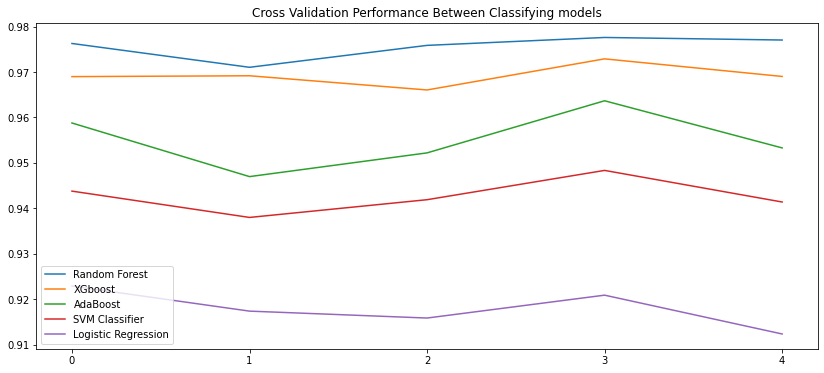

In [ ]:
plt.figure(figsize=(14, 6))

plt.title("Cross Validation Performance Between Classifying models")

sns.lineplot(data=ran_f1_cross_val_scores, label="Random Forest")
sns.lineplot(data=xgb_f1_cross_val_scores, label="XGboost")
sns.lineplot(data=ada_f1_cross_val_scores, label="AdaBoost")
sns.lineplot(data=svm_f1_cross_val_scores, label="SVM Classifier")
sns.lineplot(data=log_f1_cross_val_scores, label="Logistic Regression")

plt.xticks([0,1,2,3,4])

There are some deviations in the models, AdaB

In [ ]:
ranf_pipe.fit(ups_train_X,ups_train_y)
ranf_pred = ranf_pipe.predict(ups_test_X)

ada_pipe.fit(ups_train_X,ups_train_y)
ada_pred = ada_pipe.predict(ups_test_X)

svm_pipe.fit(ups_train_X,ups_train_y)
svm_pred = svm_pipe.predict(ups_test_X)

xgb_pipe.fit(ups_train_X, ups_train_y)
xgb_pred = xgb_pipe.predict(ups_test_X)

log_pipe.fit(ups_train_X, ups_train_y)
log_pred = log_pipe.predict(ups_test_X)

In [ ]:
from sklearn.metrics import f1_score as f1
print("Random Forest F1 Score on Test Data is:", np.round(f1(ranf_pred, ups_test_y),2))
print("AdaBoost F1 Score on Test Data is:", np.round(f1(ada_pred, ups_test_y),2))
print("SVM F1 Score on Test Data is:", np.round(f1(svm_pred, ups_test_y),2))
print("XGboost  F1 Score on Test Data is:", np.round(f1(xgb_pred, ups_test_y),2))
print("Logistic Regression F1 Score on Test Data is:", np.round(f1(log_pred, ups_test_y),2))

Random Forest F1 Score on Test Data is: 0.98
AdaBoost F1 Score on Test Data is: 0.96
SVM F1 Score on Test Data is: 0.94
XGboost  F1 Score on Test Data is: 0.97
Logistic Regression F1 Score on Test Data is: 0.91


## Testing on unsampled data

In [ ]:
ranf_unsampled = ranf_pipe.predict(X_test)
ada_unsampled = ada_pipe.predict(X_test)
svm_unsampled = svm_pipe.predict(X_test)
xgb_unsampled = xgb_pipe.predict(X_test)
log_unsampled = log_pipe.predict(X_test)

In [ ]:
print(f"Random Forest with SMOTE is {np.round(f1(ranf_pred, ups_test_y),2)} and without is {np.round(f1(ranf_unsampled, y_test),2)}")
print(f"AdaBoost with SMOTE is {np.round(f1(ada_pred, ups_test_y),2)} and without is {np.round(f1(ada_unsampled, y_test),2)}")
print(f"SVM with SMOTE is {np.round(f1(svm_pred, ups_test_y),2)} and without is {np.round(f1(svm_unsampled, y_test),2)}")
print(f"XGboost with SMOTE is {np.round(f1(xgb_pred, ups_test_y),2)} and without is {np.round(f1(xgb_unsampled, y_test),2)}")
print(f"Logistic Regression with SMOTE is {np.round(f1(log_pred, ups_test_y),3)} and without is {np.round(f1(log_unsampled, y_test),2)}")

Random Forest with SMOTE is 0.98 and without is 0.88
AdaBoost with SMOTE is 0.96 and without is 0.83
SVM with SMOTE is 0.94 and without is 0.7
XGboost with SMOTE is 0.97 and without is 0.88
Logistic Regression with SMOTE is 0.905 and without is 0.62


Applying SMOTE improves the accuracy of all models

## Importing the test dataset

In [ ]:
test_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1xcBHAkZL7vVB0MZjNFJp7-v0zVHAuCtQ')
test_df

,Unnamed: 0,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,6498,Existing Customer,43,F,2,Graduate,Married,Less than $40K,Blue,36,...,3,2,2570.0,2107,463.0,0.651,4058,83,0.766,0.820
1,9013,Existing Customer,38,F,1,College,Unknown,Less than $40K,Blue,32,...,3,3,2609.0,1259,1350.0,0.871,8677,96,0.627,0.483
2,2053,Existing Customer,39,M,2,College,Married,$60K - $80K,Blue,31,...,3,2,9871.0,1061,8810.0,0.545,1683,34,0.478,0.107
3,3211,Existing Customer,44,M,4,Graduate,Married,$120K +,Blue,32,...,3,4,34516.0,2517,31999.0,0.765,4228,83,0.596,0.073
4,5559,Attrited Customer,38,F,2,Doctorate,Married,Less than $40K,Blue,28,...,2,4,1614.0,0,1614.0,0.609,2437,46,0.438,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,8662,Existing Customer,44,M,4,Graduate,Married,$60K - $80K,Blue,24,...,2,2,4752.0,0,4752.0,0.679,7517,76,0.617,0.000
2022,5684,Existing Customer,44,M,3,Unknown,Married,$40K - $60K,Blue,36,...,2,3,9465.0,0,9465.0,0.657,3675,59,1.107,0.000
2023,4625,Existing Customer,49,M,1,Graduate,Single,$80K - $120K,Blue,42,...,2,1,17764.0,1459,16305.0,0.964,2750,57,0.900,0.082
2024,6349,Existing Customer,55,F,2,Unknown,Single,Less than $40K,Blue,45,...,2,3,3185.0,1820,1365.0,0.965,5069,81,1.025,0.571


## Changing test categorical data & dropping ID column

In [ ]:
test_df = test_df.iloc[:, 1:]
test_df.Attrition_Flag = test_df.Attrition_Flag.replace({'Attrited Customer':1,'Existing Customer':0})
test_df.Gender = test_df.Gender.replace({'F':1,'M':0})
test_df = pd.concat([test_df,pd.get_dummies(test_df['Education_Level']).drop(columns=['Unknown'])],axis=1)
test_df = pd.concat([test_df,pd.get_dummies(test_df['Income_Category']).drop(columns=['Unknown'])],axis=1)
test_df = pd.concat([test_df,pd.get_dummies(test_df['Marital_Status']).drop(columns=['Unknown'])],axis=1)
test_df = pd.concat([test_df,pd.get_dummies(test_df['Card_Category']).drop(columns=['Platinum', "Gold"])],axis=1)
test_df.drop(columns = ['Education_Level','Income_Category','Marital_Status','Card_Category', 'Avg_Open_To_Buy'],inplace=True)
test_df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Silver
0,0,43,1,2,36,6,3,2,2570.0,2107,...,0,0,0,0,1,0,1,0,1,0
1,0,38,1,1,32,2,3,3,2609.0,1259,...,0,0,0,0,1,0,0,0,1,0
2,0,39,0,2,31,6,3,2,9871.0,1061,...,0,0,1,0,0,0,1,0,1,0
3,0,44,0,4,32,6,3,4,34516.0,2517,...,1,0,0,0,0,0,1,0,1,0
4,1,38,1,2,28,5,2,4,1614.0,0,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,0,44,0,4,24,2,2,2,4752.0,0,...,0,0,1,0,0,0,1,0,1,0
2022,0,44,0,3,36,4,2,3,9465.0,0,...,0,1,0,0,0,0,1,0,1,0
2023,0,49,0,1,42,6,2,1,17764.0,1459,...,0,0,0,1,0,0,0,1,1,0
2024,0,55,1,2,45,6,2,3,3185.0,1820,...,0,0,0,0,1,0,0,1,1,0


In [ ]:
X_real_test = test_df.iloc[:,1:]
y_real_test = test_df.iloc[:,0].values

In [ ]:
test_set_ranf = ranf_pipe.predict(X_real_test)

In [ ]:
cm = confusion_matrix(y_real_test, test_set_ranf)
print(cm)
accuracy_score(y_real_test, test_set_ranf)

[[1668   27]
 [  13  318]]


0.9802566633761106

In [ ]:
""" 
Inspiration: 
https://www.kaggle.com/code/thomaskonstantin/bank-churn-data-exploration-and-churn-prediction
https://www.kaggle.com/code/upadorprofzs/credit-card-customer-analysis-ml-xgbtree
https://www.kaggle.com/code/vivek468/will-the-customer-churn

Sources:
https://towardsdatascience.com/cross-validation-430d9a5fee22
https://towardsdatascience.com/are-you-dropping-too-many-correlated-features-d1c96654abe6
"""

' \nInspiration: \nhttps://www.kaggle.com/code/thomaskonstantin/bank-churn-data-exploration-and-churn-prediction\nhttps://www.kaggle.com/code/upadorprofzs/credit-card-customer-analysis-ml-xgbtree\nhttps://www.kaggle.com/code/vivek468/will-the-customer-churn\n\nSources:\nhttps://towardsdatascience.com/cross-validation-430d9a5fee22\nhttps://towardsdatascience.com/are-you-dropping-too-many-correlated-features-d1c96654abe6\n'